In [31]:
import matplotlib.pyplot as plt
import numpy as np

from spiketrain.kernel.fun import KernelFun
from spiketrain.sptr import SpikeTrains

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Compute ISI distribution

(array([153.,  89.,  58.,  31.,  20.,  18.,   5.,   2.,   2.,   1.]),
 array([0.001 , 0.0258, 0.0506, 0.0754, 0.1002, 0.125 , 0.1498, 0.1746,
        0.1994, 0.2242, 0.249 ]),
 <BarContainer object of 10 artists>)

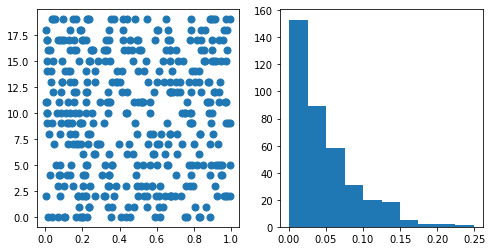

In [4]:
# Generate samples from a homogeneous Poisson process
st = SpikeTrains.poisson_process_hom(rate=2e1, 
                                     time_end=1e0, 
                                     dt=1e-3, 
                                     ntrains=20)

# Compute all the interspike intervals
isis = st.interspike_intervals()

fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)
st.plot(ax=ax1)
ax2.hist(isis)

## Compute PSTH

In [32]:
# Generate samples from an inhomogeneous Poisson process
dt = 1e-3
t = np.arange(0, 1, dt)
tau = 0.1
rate = np.exp(6 * t / tau * np.exp(-t / tau) + 1.5)

st = SpikeTrains.poisson_process_inh(rate=rate, 
                                     dt=1e-3, 
                                     ntrains=20)

# Compute the psth using a Gaussian kernel
ker = KernelFun.gaussian_delta(delta=5e-3)
psth = st.psth(ker)

fig, (ax1, ax2) = plt.subplots(figsize=(8, 8), nrows=2)
st.plot(ax=ax1)
ax2.plot(t, rate, label='rate')
ax2.plot(t, psth, label='psth')
ax2.legend()

AttributeError: 'KernelFun' object has no attribute 'fftconvolve'